In [21]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
ticker = 'AMZN'
data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
data = data[['Close']]


/tmp/ipython-input-21-4227476821.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


In [16]:
#Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
#Splitting the dataset
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [17]:
#Creating the Dataset
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)


X_train, y_train = create_dataset(train_data)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)


#Model Building
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0313
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 6.9079e-04
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 6.1675e-04
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.6606e-04
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 5.6764e-04
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 5.6562e-04
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 5.0407e-04
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 4.5767e-04
Epoch 9/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.8892e-04
Epoch 10/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 4.8024e-04


In [22]:
#Model Evaluation
X_test, y_test = create_dataset(test_data)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1))

#MAE
mae = mean_absolute_error(actual, predictions)
print(f"MAE: {mae:.2f}")

#MSE
mse = mean_squared_error(actual, predictions)
print(f"MSE: {mse:.2f}")

#RMSE
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")

#R-Squared
r2 = r2_score(actual, predictions)
print(f"R² Score: {r2:.4f}")

#DA
directional_accuracy = np.mean(
    np.sign(predictions[1:] - predictions[:-1]) == np.sign(actual[1:] - actual[:-1])
)
print(f"Directional Accuracy: {directional_accuracy * 100:.2f}%")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
MAE: 4.01
MSE: 28.24
RMSE: 5.31
R² Score: 0.9722
Directional Accuracy: 47.74%


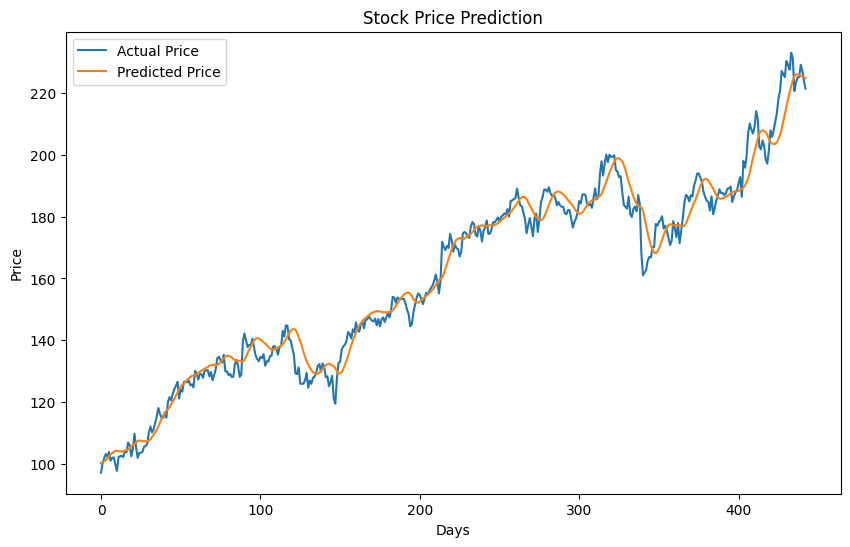

In [20]:
#Plotting Actual vs Predicted
plt.figure(figsize=(10,6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
